In [19]:
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
from torch import nn

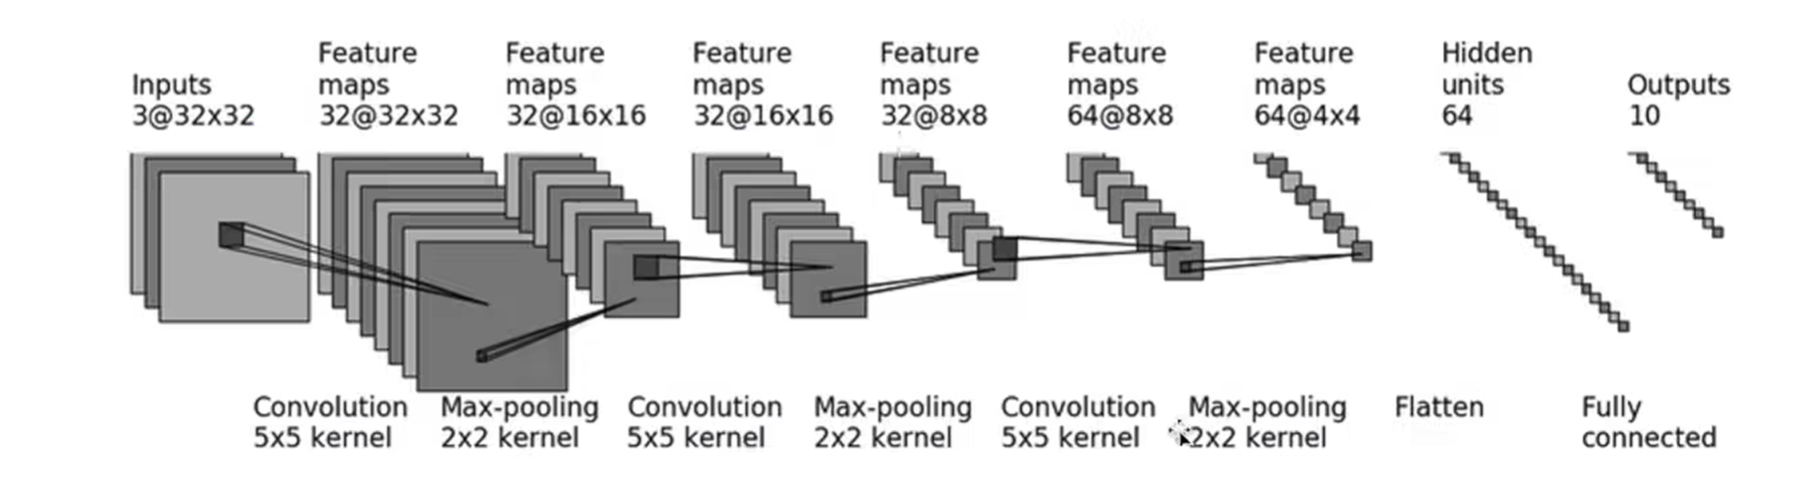

In [20]:
class Net(nn.Module): 
    def __init__(self):
        super().__init__()
        self.seq=nn.Sequential(
            nn.Conv2d(3,32,5,padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32,32,5,padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(32,64,5,padding=2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(576,64),
            nn.Linear(64,10)
        )

    def forward(self,x):
        x = self.seq(x)
        return x

In [21]:
net = Net()
input = torch.ones((64,3,32,32))
output = net(input)
print(output.shape)

torch.Size([64, 10])


In [ ]:
from torch.utils.tensorboard import SummaryWriter

# writer = SummaryWriter("../logs_seq")
# writer.add_graph(net,input)
# writer.close()
with SummaryWriter("../logs_seq") as writer:
    writer.add_graph(net,input)

# 在终端里输入
# tensorboard tensorboard --logdir=路径 --port=6007